In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# (1) Sơ bộ về dữ liệu
1. mô tả dữ liệu
2. kiểm tra tính toàn vẹn

## Mô tả dữ liệu

In [77]:
df= pd.read_csv('credit_card_customers.csv')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10127 non-null  int64  
 1   CLIENTNUM                 10127 non-null  int64  
 2   Attrition_Flag            10127 non-null  object 
 3   Customer_Age              10127 non-null  int64  
 4   Gender                    10127 non-null  object 
 5   Dependent_count           10127 non-null  int64  
 6   Education_Level           10127 non-null  object 
 7   Marital_Status            10127 non-null  object 
 8   Income_Category           10127 non-null  object 
 9   Card_Category             10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

(10127, 22)

In [3]:
#df= df.drop('Unnamed: 0', axis = 1)
object_columns = df.select_dtypes(include=['object']).columns
int_columns = df.select_dtypes(include=['int']).columns
float_columns = df.select_dtypes(include=['float']).columns

# Print the number of object data type columns
print(f'có {len(object_columns)} dạng object: {(object_columns)} \n có {len(int_columns)} dạng int: {(int_columns)} \n có {len(float_columns)} dạng float: {(float_columns)}')

có 6 dạng object: Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object') 
 có 11 dạng int: Index(['Unnamed: 0', 'CLIENTNUM', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object') 
 có 5 dạng float: Index(['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


## kiểm tra tính toán vẹn dữ liệu

In [4]:
len(df[df.duplicated])


0

In [5]:
df.isnull().any()

Unnamed: 0                  False
CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [6]:
col = df.columns
unKnow_col = []
for i in col:
    temp = df[i].unique()
    for j in temp:
        if j == 'Unknown':
            unKnow_col.append(i)


print(unKnow_col)

['Education_Level', 'Marital_Status', 'Income_Category']


In [7]:
from sklearn.impute import SimpleImputer
replace_un = {'Unknown': np.nan}
df_clean = df.copy()
for i in unKnow_col:

    df_clean[i].replace(replace_un, inplace=True)
    imp = SimpleImputer(strategy="most_frequent")
    df_clean[[i]] = imp.fit_transform(df_clean[[i]])



**Dữ liệu toàn vẹn**


# (2) Thống kê mô tả
1. Thống kê mô tả 1 biến
2. Thống kê mô tả 2 biến

## Thống kê mô tả biến dữ liệu string

### Thống kê mô tả 1 biến

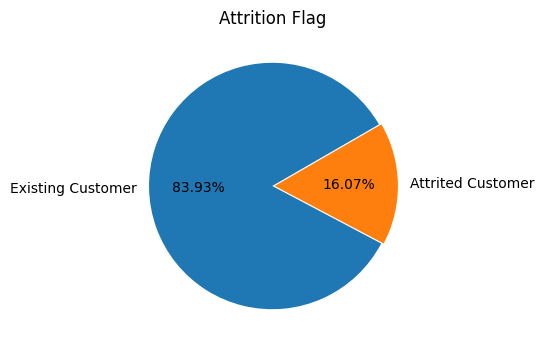

In [8]:
number_of_customers = df_clean['Attrition_Flag'].value_counts()

plt.figure(figsize=(9,4))
plt.pie(number_of_customers, labels=number_of_customers.index, autopct='%1.2f%%',
        startangle=30, explode=[0, 0.02])
plt.title('Attrition Flag')

plt.show()

Có 1627 khách rời khỏi chiếm khoảng 16.07 % lượng khách hàng. Tuy không lớn nhưng cũng có thể thấy được sự thay đổi của khách hàng. Và cũng gây khó khăn trong dự báo khi dữ liệu không căn bằng.

  Gender  count    percent
0      F   5358  52.908068
1      M   4769  47.091932


<Figure size 1000x600 with 0 Axes>

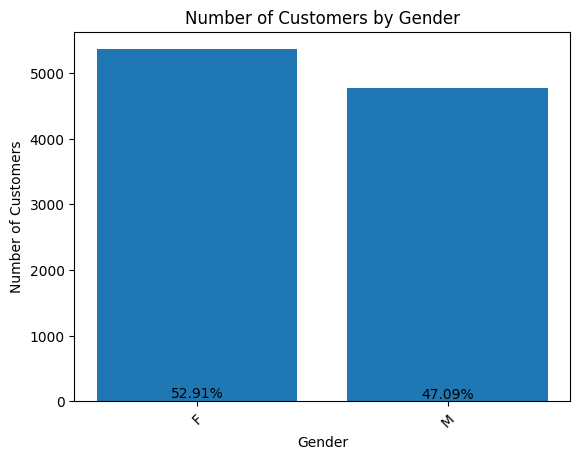

  Education_Level  count    percent
0        Graduate   4647  45.887232
1     High School   2013  19.877555
2      Uneducated   1487  14.683519
3         College   1013  10.002962
4   Post-Graduate    516   5.095290
5       Doctorate    451   4.453441


<Figure size 1000x600 with 0 Axes>

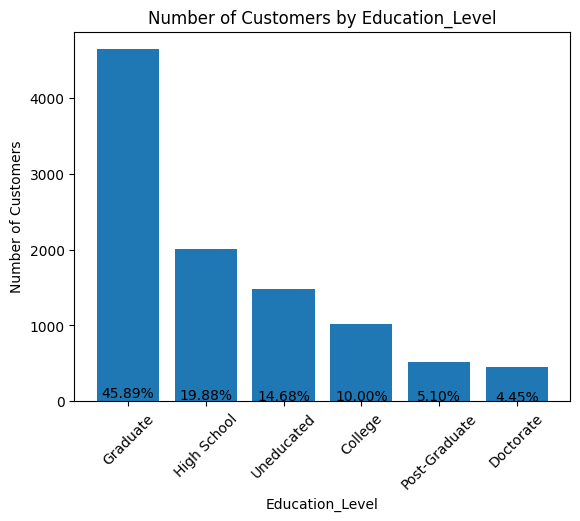

  Marital_Status  count    percent
0        Married   5436  53.678286
1         Single   3943  38.935519
2       Divorced    748   7.386195


<Figure size 1000x600 with 0 Axes>

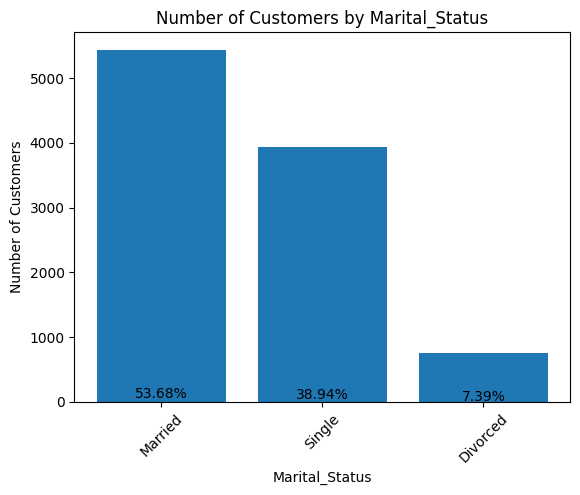

  Income_Category  count    percent
0  Less than $40K   4673  46.143972
1     $40K - $60K   1790  17.675521
2    $80K - $120K   1535  15.157500
3     $60K - $80K   1402  13.844179
4         $120K +    727   7.178829


<Figure size 1000x600 with 0 Axes>

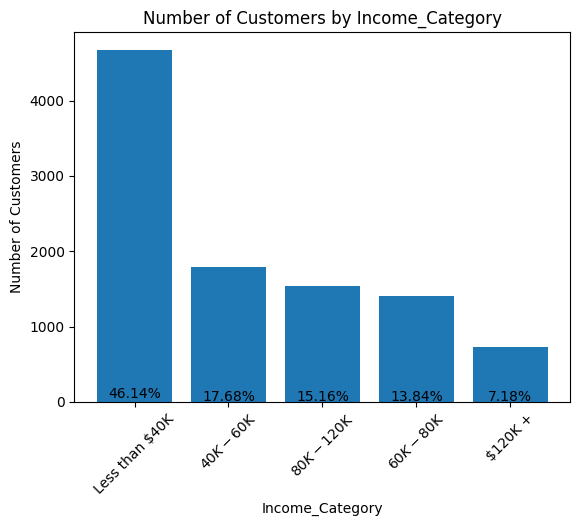

  Card_Category  count    percent
0          Blue   9436  93.176656
1        Silver    555   5.480399
2          Gold    116   1.145453
3      Platinum     20   0.197492


<Figure size 1000x600 with 0 Axes>

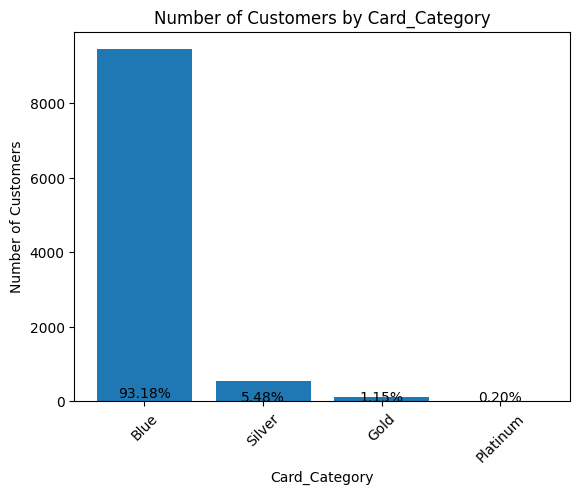

In [9]:
title_cat = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def bar_chart(col):
    temp = df_clean[col].value_counts()
    total = temp.sum()
    temp = temp.to_frame('count').reset_index()
    temp['percent'] = temp['count'] / total * 100

    fig, ax = plt.subplots()
    ax.bar(temp[col], temp['count'])
    ax.set_xlabel(col)
    ax.set_ylabel('Number of Customers')
    ax.set_title('Number of Customers by ' + col)

    for i, v in enumerate(temp['percent']):
        ax.text(i, v + 1, "{:0.2f}%".format(v), ha='center')
    plt.xticks(rotation=45)

    print(temp)

for i in title_cat:
    plt.figure(figsize=(10, 6))
    bar_chart(i)
    plt.show()

#### Nhận xét:
    1. Giới tính khách hàng ở đây khá cân bằng .
    2. Khách hàng đã tốt nghiệp chiếm nhiều nhất
    3. Khách hàng có gia đình chiếm nhiều nhất
    4. Khách hàng thường có thu nhập thấp hơn $40K
    5. Loại thẻ đa số là Blue

### Thống kê mô tả 2 biến

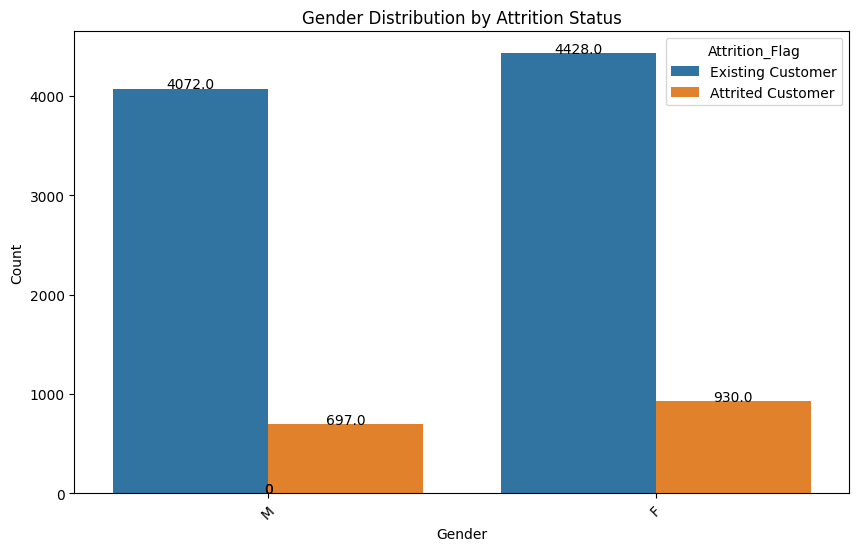

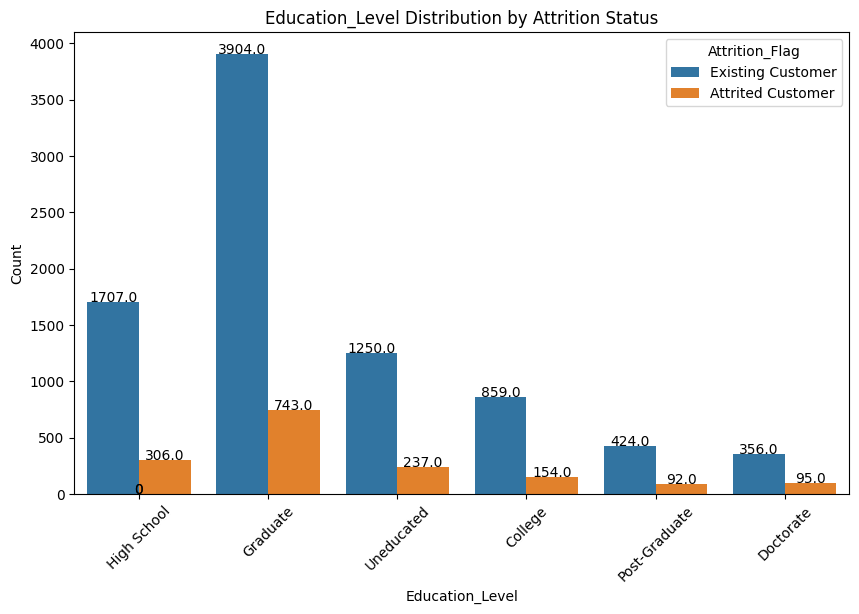

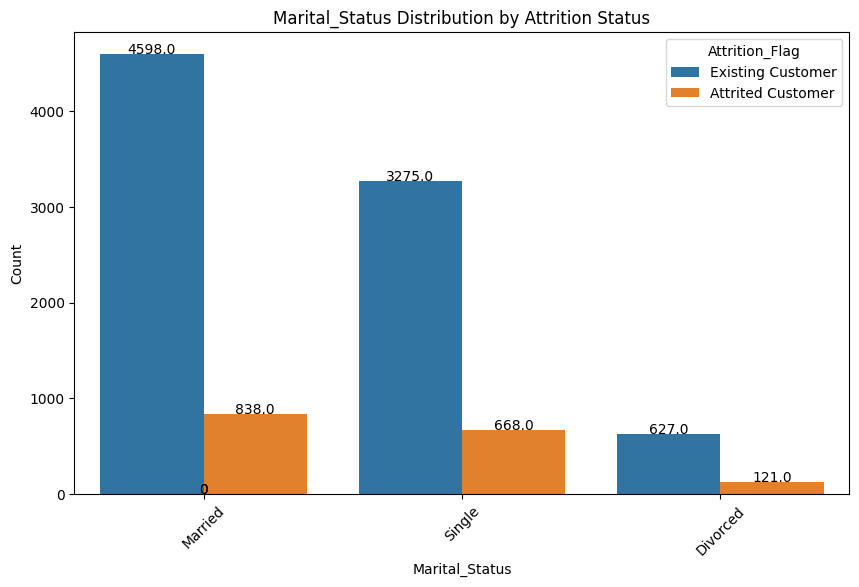

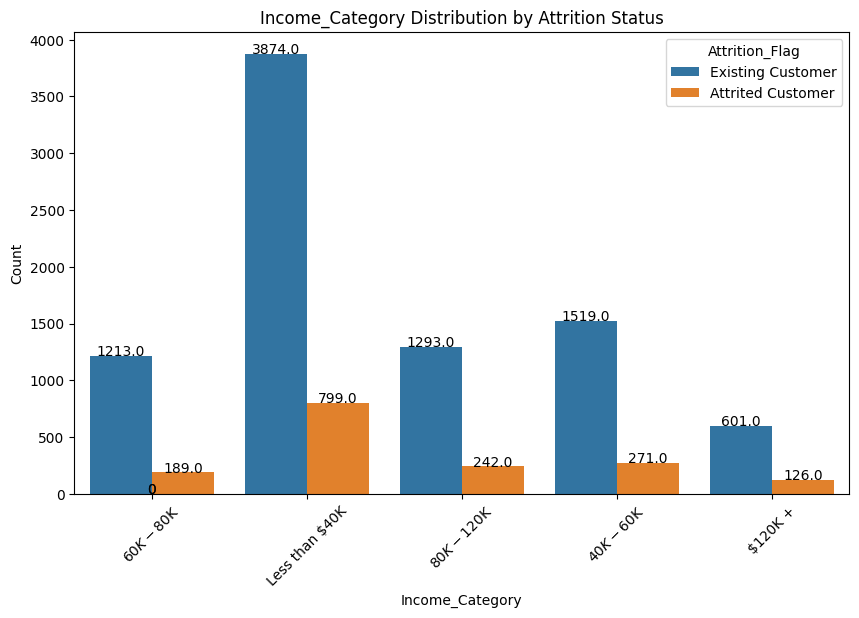

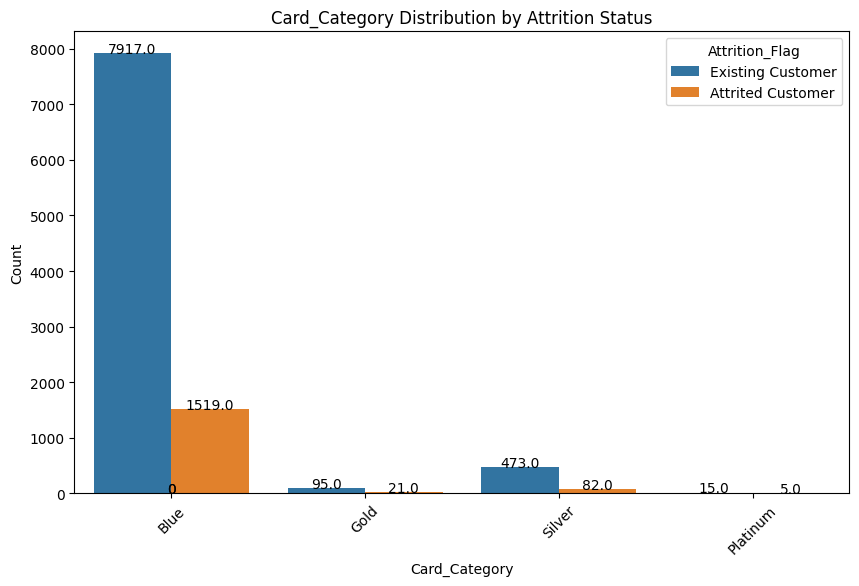

In [10]:
title_cats = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for cat in title_cats:
    plt.figure(figsize=(10, 6))
    chart = sns.countplot(x=cat, hue='Attrition_Flag', data=df_clean)
    plt.title(f'{cat} Distribution by Attrition Status')
    plt.xlabel(cat)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Add percentages on top of each bar
    total = len(df_clean[cat])
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x()+p.get_width()/2.,height + 3, height, ha="center") 
    
    plt.show()


**Nhận xet**
Giới tính
    + 930 khách hàng nữ không còn sử dụng thẻ tín dụng và 4428 khách hàng nữ vẫn còn sử dụng thẻ tín dụng
    + 697 khách hàng nam không còn sử dụng thẻ tín dụng và 4072 khách hàng nam vẫn còn sử dụng thẻ tín dụng
    Có 42.8 phần trăm nam không còn sử thẻ và 57,2 rời bỏ thẻ

Trình độ học vấn
    + Trong số khách hàng tốt nghiệp cao đẳng có 154 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 859 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng tốt nghiệp tiến sĩ có 95 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 356 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng tốt nghiệp đại học có 487 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 2641 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng tốt nghiệp THPT có 306 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 1707 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng tốt nghiệp sau đại học có 92 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 424 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng không đi học có 237 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 1250 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng có trình độ học vấn khác có 256 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 1263 khách hàng vẫn còn sử dụng.
    => người tốt nghiệp đại học có tỉ lệ rời bỏ cao nhất

... Viết tiếp cho xong 4 cái

## Thống kê mô tả các biến dữ liệu số và biến mục tiêu

In [11]:
df_clean.describe()

,Unnamed: 0,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,5063.000000,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,2923.557422,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,2531.500000,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,5063.000000,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7594.500000,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,10126.000000,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
def plot_num(var):
    plt.rcParams['figure.figsize']=(12,8)
    plt.subplot(1,2,1)
    sns.histplot(data=df_clean,x=var,hue='Attrition_Flag',kde=True);
    
    plt.subplot(1,2,2)
    sns.boxplot(x='Attrition_Flag',y=var,data=df_clean);


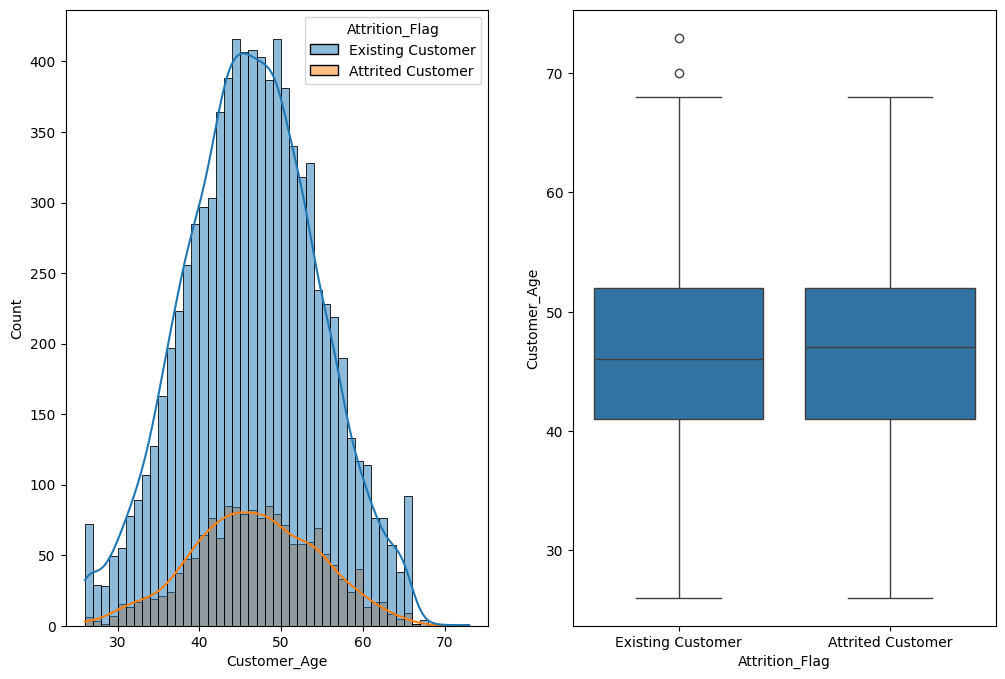

In [13]:
plot_num('Customer_Age')

Nhìn vào hình ta thấy đa số khách hàng rời bỏ thẻ tín dụng ở độ tuổi 40-55.

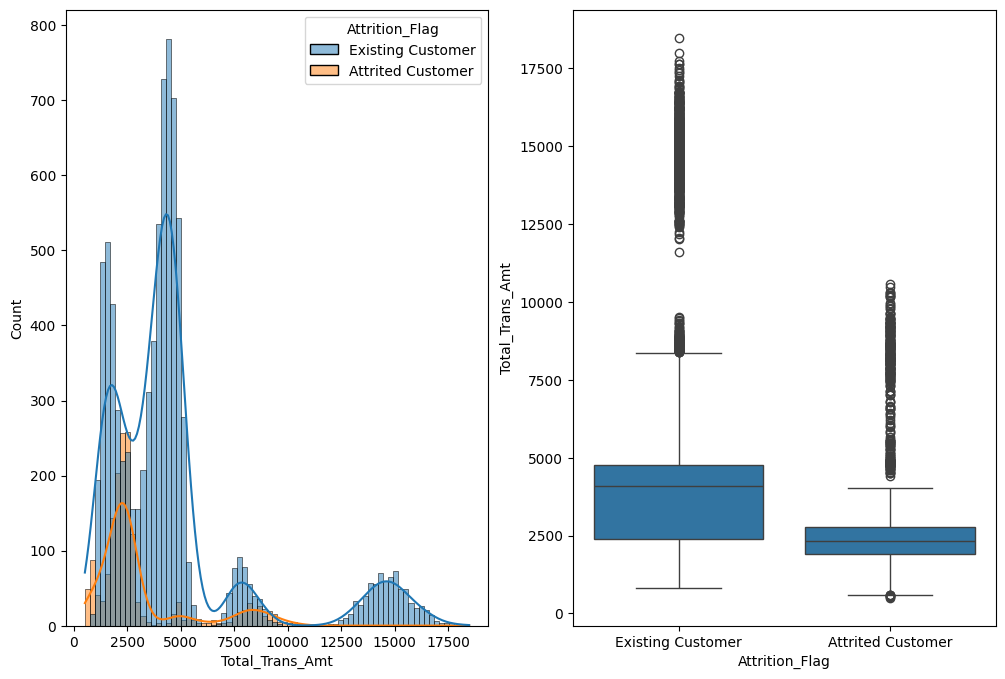

In [14]:
plot_num('Total_Trans_Amt')

Nhìn vào đây ta thấy đa số khách hàng rời bỏ giảm dần theo tổng mức chi tiêu thẻ tín dụng. Khách hàng có tổng mức chi tiêu thẻ tín dụng nằm ở khoảng dưới 5000 có tỷ lệ rời bỏ thẻ tín dụng cao nhất.

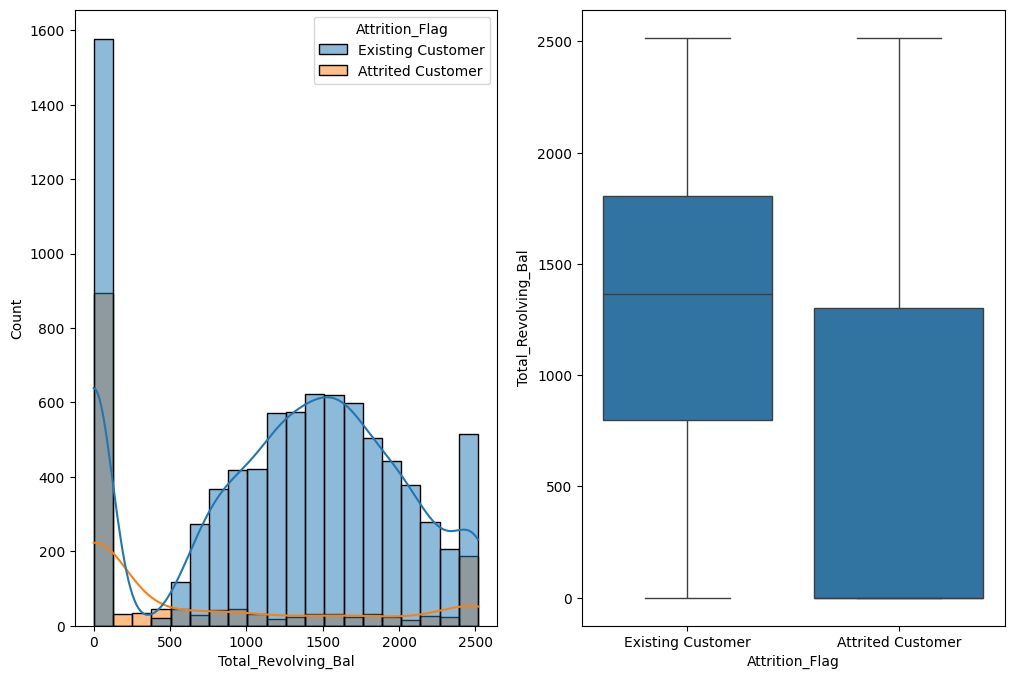

In [15]:
plot_num('Total_Revolving_Bal') 


0        39
1        44
2        36
3        34
4        21
         ..
10122    40
10123    25
10124    36
10125    36
10126    25
Name: Months_on_book, Length: 10127, dtype: int64

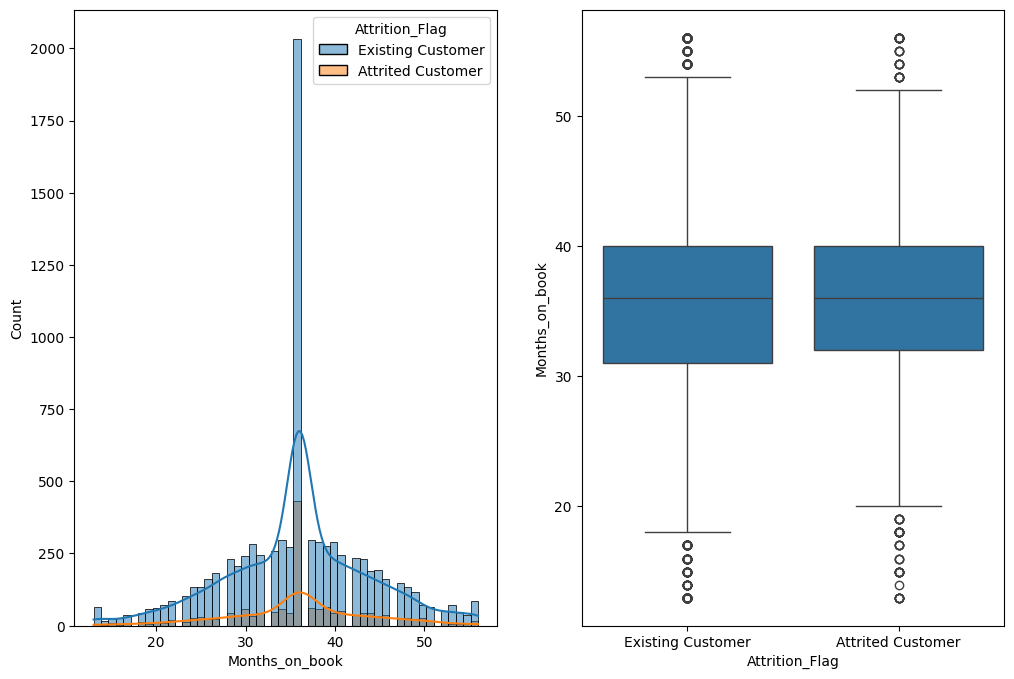

In [16]:
plot_num('Months_on_book')
df.Months_on_book

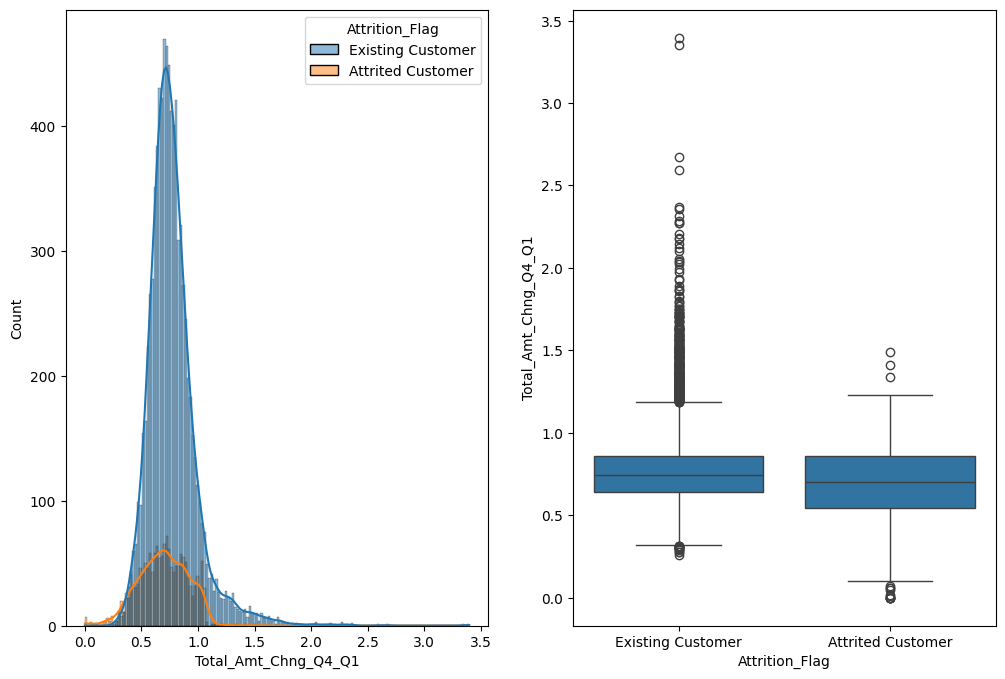

In [17]:
plot_num('Total_Amt_Chng_Q4_Q1')

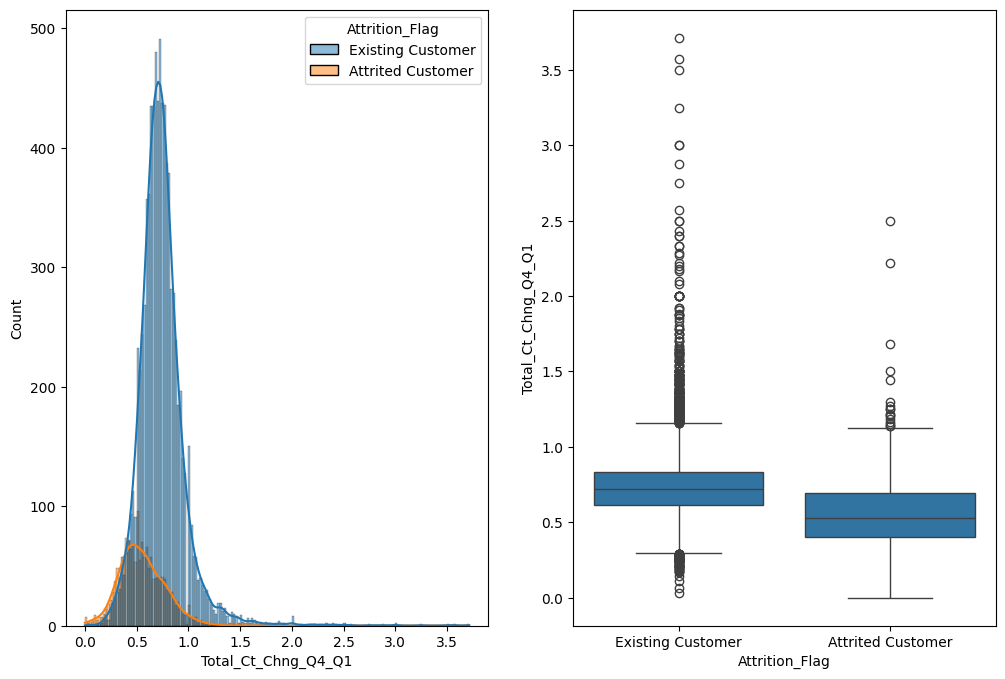

In [18]:
plot_num('Total_Ct_Chng_Q4_Q1')

In [19]:
df.columns

Index(['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

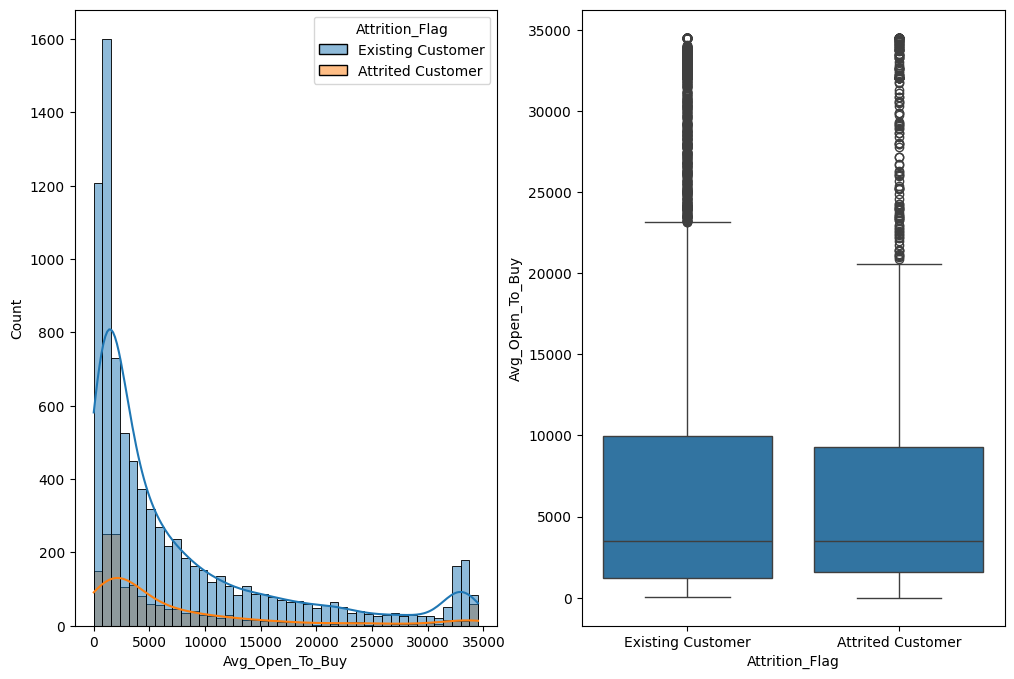

In [20]:
plot_num('Avg_Open_To_Buy')



In [21]:
df.describe()

,Unnamed: 0,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,5063.000000,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,2923.557422,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,2531.500000,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,5063.000000,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7594.500000,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,10126.000000,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# (3) Dự báo
1. Chuẩn hóa dữ liệu
2. Chọn đặc tính liên quan
3. Lập mô hình


## Số hóa dữ liệu

In [31]:
from sklearn.impute import SimpleImputer

df1 = df_clean.copy()
df1 = df1.drop('Unnamed: 0', axis = 1)


mappings = {
    "card_cat": {"Blue": 0, "Silver": 1, "Gold": 2, "Platinum": 3},
    "income_cat": {
        "Less than $40K": 0,
        "$40K - $60K": 1,
        "$60K - $80K": 2,
        "$80K - $120K": 3,
        "$120K +": 4,
    },
    "gender": {"F": 0, "M": 1},
    "att_flag": {"Existing Customer": 0, "Attrited Customer": 1},
    "marital_status": {"Single": 0, "Married": 1, "Divorced": 2},
    "educt_level": {
        "Uneducated": 0,
        "High School": 1,
        "College": 2,
        "Graduate": 3,
        "Post-Graduate": 4,
        "Doctorate": 5,
    },
    "Attrition_Flag": {"Existing Customer": 0, "Attrited Customer": 1},
}

    


for col, mapping in mappings.items():
    df1.replace(mapping, inplace=True)
    
for i in object_columns:
    print(f'{i}: {df1[i].unique()}')

df1

Attrition_Flag: [0 1]
Gender: [1 0]
Education_Level: [1 3 0 2 4 5]
Marital_Status: [1 0 2]
Income_Category: [2 0 3 1 4]
Card_Category: [0 2 1 3]


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,1,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,3,0,0,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,3,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,1,1,0,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,0,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,0,1,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,2,3,2,1,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,1,1,0,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,2,3,1,1,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [33]:
from sklearn.preprocessing import MinMaxScaler

df1.head()
col_to_scal = ['Customer_Age','Months_on_book','Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt','Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
scaler =  MinMaxScaler()
df1[col_to_scal] = scaler.fit_transform(df1[col_to_scal])
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,0.404255,1,3,1,1,2,0,0.604651,...,1,3,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061
1,818770008,0,0.489362,0,5,3,0,0,0,0.720930,...,1,2,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105
2,713982108,0,0.531915,1,3,3,1,3,0,0.534884,...,1,0,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000
3,769911858,0,0.297872,0,4,1,1,0,0,0.488372,...,4,1,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760
4,709106358,0,0.297872,1,3,0,1,2,0,0.186047,...,1,0,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000


## xem xét độ tương quan các biến

<Axes: >

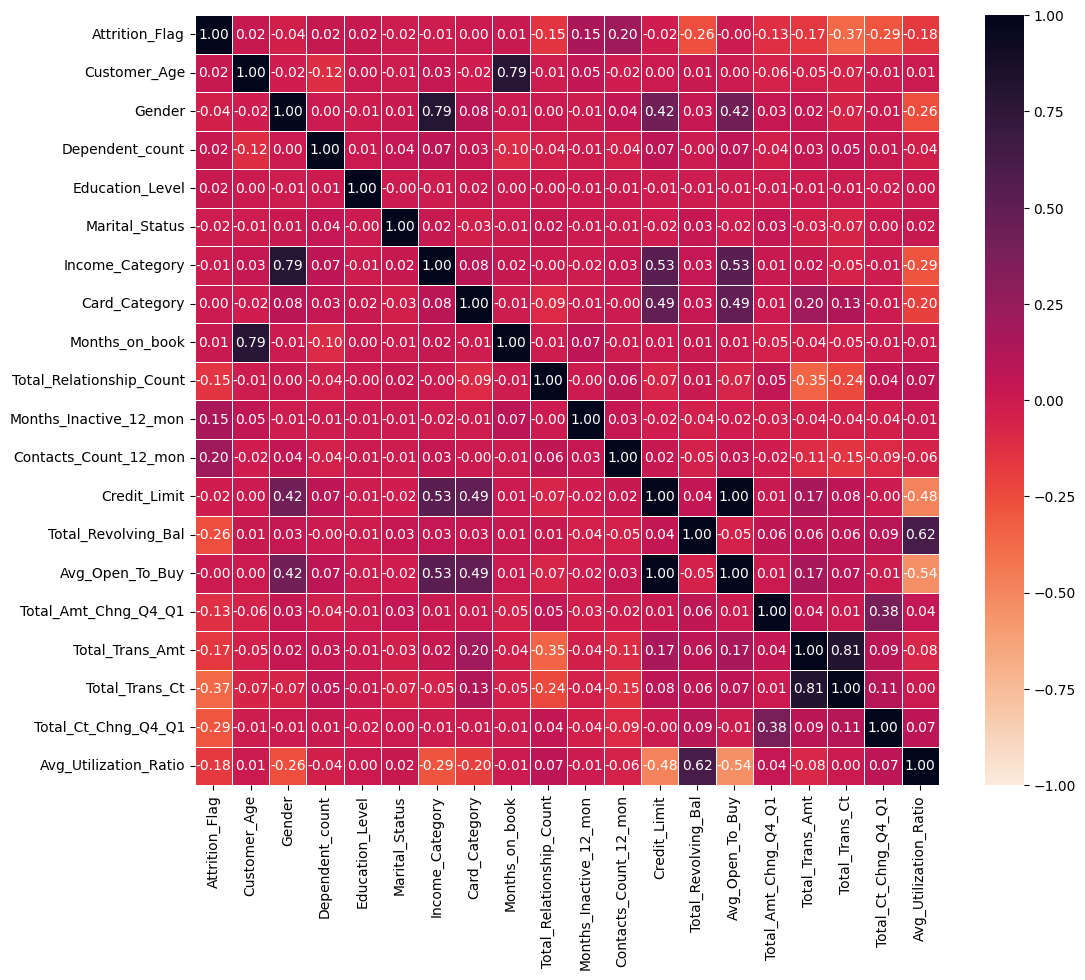

In [34]:
df2 = df1.drop('CLIENTNUM', axis = 1)
corr_matrix_df = df2.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_df, vmin= -1, vmax= 1, linewidths=0.5, cmap='rocket_r', annot=True, fmt='.2f') 


In [35]:
# high relative
col = df2.columns
for i in range(len(col)):
    for j in range(i, len(col)):
        if corr_matrix_df[col[i]][j] > 0.7 and corr_matrix_df[col[i]][j] <= 1 and col[i] != col[j-i]:
           print(f'high relative 1: {col[i]} and {col[j-i]}')


high relative 1: Customer_Age and Attrition_Flag
high relative 1: Customer_Age and Card_Category
high relative 1: Gender and Attrition_Flag
high relative 1: Gender and Education_Level
high relative 1: Dependent_count and Attrition_Flag
high relative 1: Education_Level and Attrition_Flag
high relative 1: Marital_Status and Attrition_Flag
high relative 1: Income_Category and Attrition_Flag
high relative 1: Card_Category and Attrition_Flag
high relative 1: Months_on_book and Attrition_Flag
high relative 1: Total_Relationship_Count and Attrition_Flag
high relative 1: Months_Inactive_12_mon and Attrition_Flag
high relative 1: Contacts_Count_12_mon and Attrition_Flag
high relative 1: Credit_Limit and Attrition_Flag
high relative 1: Credit_Limit and Gender
high relative 1: Total_Revolving_Bal and Attrition_Flag
high relative 1: Avg_Open_To_Buy and Attrition_Flag
high relative 1: Total_Amt_Chng_Q4_Q1 and Attrition_Flag
high relative 1: Total_Trans_Amt and Attrition_Flag
high relative 1: Total_

In [36]:

for i in range(len(col)):
    for j in range(i, len(col)):
        if corr_matrix_df[col[i]][j] >= -1 and corr_matrix_df[col[i]][j] <= -0.4 and col[i] != col[j-i]:
           print(f'high relative -1: {col[i]} and {col[j-i]}')

high relative -1: Credit_Limit and Card_Category
high relative -1: Avg_Open_To_Buy and Marital_Status


Xem xét loại bỏ các biến có tương quan thấp với biến mục tiêu.

Xem xét loại bỏ các  biến độc lập có tương quan cao với nhau.

khi mô hình dự báo không có sự chính xác cao

In [ ]:
%pip install scikit_learn
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [42]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report


## thiết lập mô hình

In [43]:
x = df2.drop(columns=['Attrition_Flag'])
y = df2['Attrition_Flag']

### chạy thử nếu ko xử lý imbalance và loại bỏ các biến

In [44]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train.value_counts()

(10127, 19) (7088, 19) (3039, 19) (7088,) (3039,)


Attrition_Flag
0    5939
1    1149
Name: count, dtype: int64

In [45]:
dict ={
'logisticRegression' : LogisticRegression(),
'DecisionTreeClassifier' : DecisionTreeClassifier(),
'SVC' : SVC(),
'RandomForestClassifier': RandomForestClassifier()
}
for model, algorithm in dict.items():
    temp = algorithm
    algorithm.fit(X_train, y_train)
    acc = algorithm.score(X_test, y_test)
    y_pred = algorithm.predict(X_test)
    cl_rep = classification_report(y_test, y_pred)
    print(y_pred)
    print(f'Score of {model}: {acc}')
    print(cl_rep)

[0 0 0 ... 0 0 1]
Score of logisticRegression: 0.9016123724909509
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2561
           1       0.79      0.51      0.62       478

    accuracy                           0.90      3039
   macro avg       0.85      0.74      0.78      3039
weighted avg       0.89      0.90      0.89      3039

[0 0 0 ... 0 0 1]
Score of DecisionTreeClassifier: 0.9424152681803225
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2561
           1       0.83      0.79      0.81       478

    accuracy                           0.94      3039
   macro avg       0.90      0.88      0.89      3039
weighted avg       0.94      0.94      0.94      3039

[0 0 0 ... 0 0 0]
Score of SVC: 0.8871339256334321
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2561
           1       0.90      0.32      0.47       

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

def model_to_train(model, X_train,y_train, X_test):

    dct_model = model
    dct_model.fit(X_train, y_train)
    y_pred = dct_model.predict(X_test)
    return y_pred

# Create confusion matrix using predicted and actual values
def test(y_test, y_pred):
    conf = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix:\n\n{conf}\n")

    # Plot confusion matrix
    group_names = ['True Negative', 'False Positive','False Negative','True Positive']
    categories = ['0 : Existing', '1 : Attrited']

    group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.array([labels]).reshape(2,2)

    sns.heatmap(conf, annot=labels, fmt='', cmap='Blues',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel(f"Predicted Label")

    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Display classification report
    conf_rp = classification_report(y_test, y_pred)
    print(f"\nClassification Report:\n")
    print(f"{conf_rp}\n")

    # Display Accuracy score using RandomForestClassifier model
    acs = accuracy_score(y_test, y_pred)
    print(f"Accuracy score (DecisionTreeClassifier model) = {acs:.4f} ({acs:.2%})")

Confusion matrix:

[[2435  105]
 [   7 2553]]



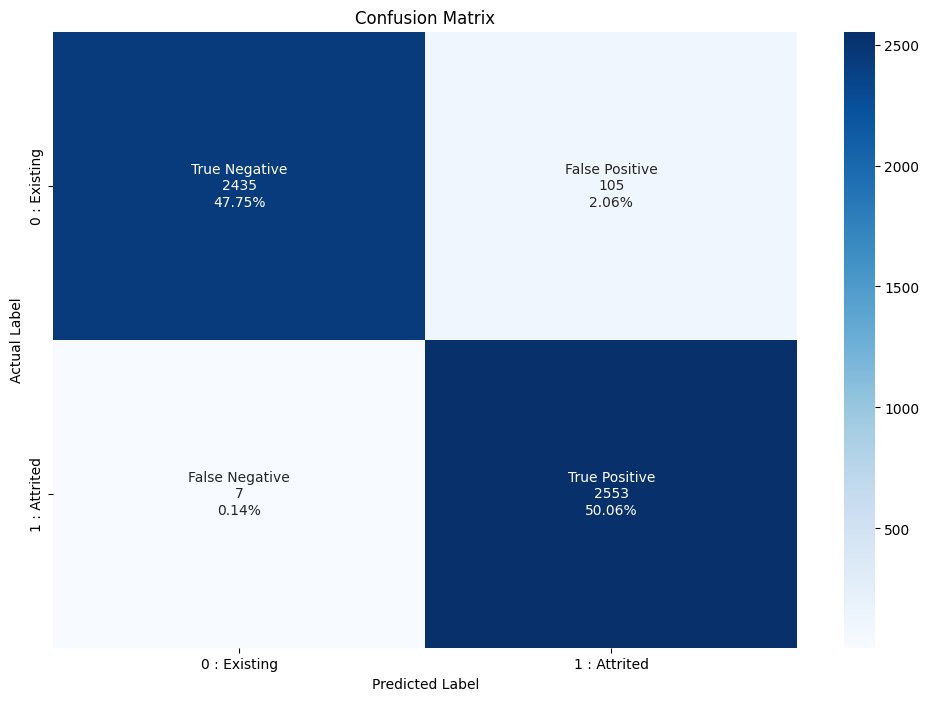


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2540
           1       0.96      1.00      0.98      2560

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100


Accuracy score (DecisionTreeClassifier model) = 0.9780 (97.80%)


In [75]:
y_pred = model_to_train(dict['DecisionTreeClassifier'], X_train, y_train, X_test)
test(y_test, y_pred)

Confusion matrix:

[[2534   27]
 [  89  389]]



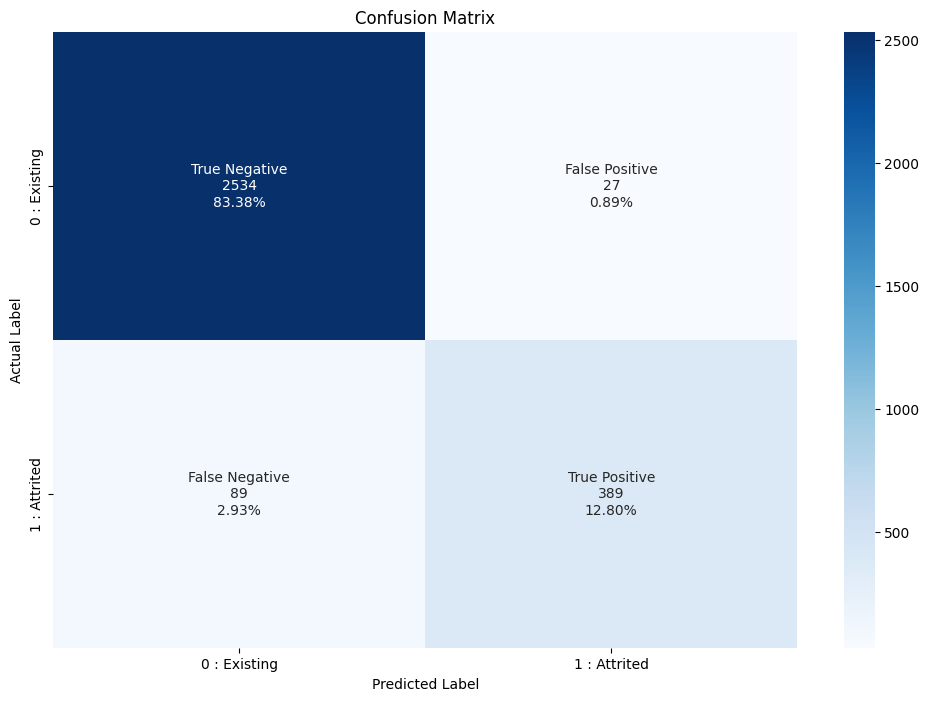


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2561
           1       0.94      0.81      0.87       478

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039


Accuracy score (DecisionTreeClassifier model) = 0.9618 (96.18%)


In [48]:
y_pred = model_to_train(dict['RandomForestClassifier'], X_train, y_train, X_test)
test(y_test, y_pred)

Các chỉ số chưa cao lắm

### Loại bỏ biến và xử lý imbalance dữ liệu train

Text(0.5, 1.0, 'RandomForestClassifier')

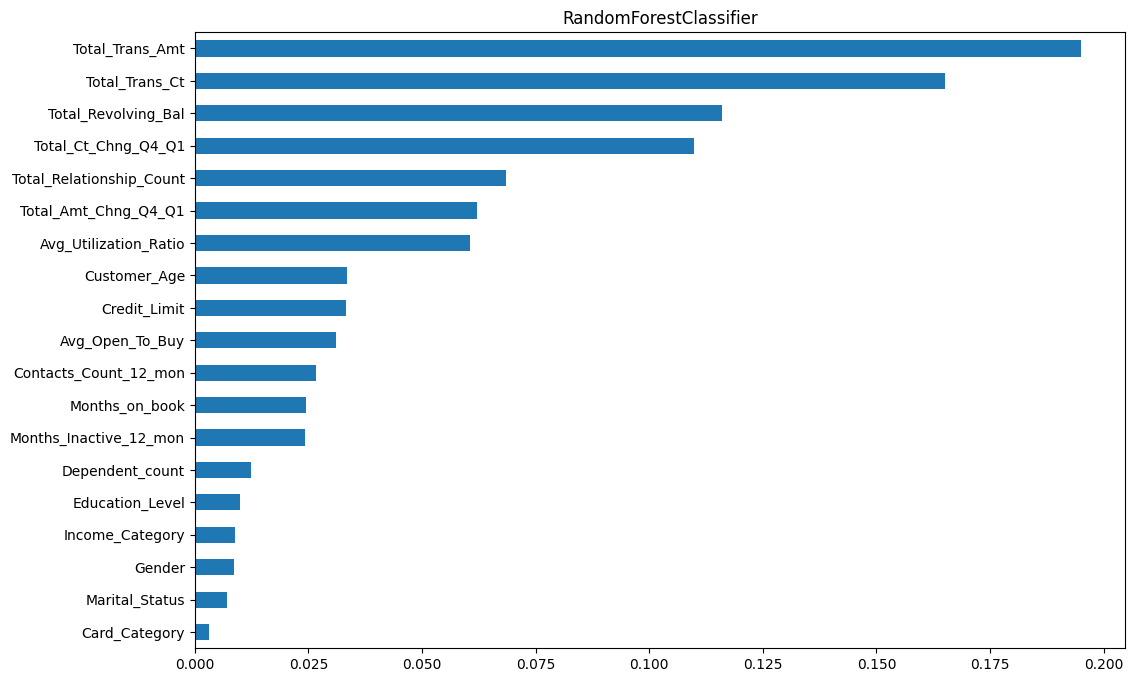

In [50]:
model_rf = RandomForestClassifier(n_estimators=250, criterion='gini', random_state=0)
model_rf.fit(x,y)
temp = pd.Series(model_rf.feature_importances_, index=x.columns).sort_values(ascending=True)
temp.plot(kind ='barh')
plt.title('RandomForestClassifier')



In [51]:
df_fi = df2[temp[temp > 0.01].index]
df_fi.head()
df_scaled = pd.concat([df_fi,df1[['Attrition_Flag']]], axis=1)
df_scaled

,Dependent_count,Months_Inactive_12_mon,Months_on_book,Contacts_Count_12_mon,Avg_Open_To_Buy,Credit_Limit,Customer_Age,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Total_Relationship_Count,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Trans_Ct,Total_Trans_Amt,Attrition_Flag
0,3,1,0.604651,3,0.345116,0.340190,0.404255,0.061,0.392994,5,0.437534,0.308701,0.248062,0.035273,0
1,5,1,0.720930,2,0.214093,0.206112,0.489362,0.105,0.453636,6,1.000000,0.343266,0.178295,0.043452,0
2,3,1,0.534884,0,0.098948,0.059850,0.531915,0.000,0.763615,4,0.628164,0.000000,0.077519,0.076611,0
3,4,4,0.488372,1,0.022977,0.056676,0.297872,0.760,0.413600,3,0.628164,1.000000,0.077519,0.036775,0
4,3,1,0.186047,0,0.136557,0.099091,0.297872,0.000,0.640271,5,0.673129,0.000000,0.139535,0.017025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,2,2,0.627907,3,0.062266,0.077536,0.510638,0.462,0.206947,3,0.230749,0.735399,0.829457,0.832647,0
10123,2,2,0.279070,3,0.060499,0.085819,0.319149,0.511,0.236679,4,0.183899,0.868494,0.457364,0.459219,1
10124,1,3,0.534884,4,0.156637,0.120042,0.382979,0.000,0.241095,5,0.220248,0.000000,0.387597,0.544175,1
10125,2,3,0.534884,3,0.152928,0.116172,0.085106,0.000,0.157492,4,0.194400,0.000000,0.403101,0.438689,1


In [52]:
#imbalance Data
df_class_1 = df_scaled[df_scaled['Attrition_Flag'] == 1]
df_class_0 = df_scaled[df_scaled['Attrition_Flag'] == 0]
count_class_0, count_class_1 = df1['Attrition_Flag'].value_counts()
print(count_class_0, count_class_1)


8500 1627


In [53]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_test_over = pd.concat([df_class_1_over, df_class_0 ], axis = 0)
df_class_1_over.shape
df_test_over

,Dependent_count,Months_Inactive_12_mon,Months_on_book,Contacts_Count_12_mon,Avg_Open_To_Buy,Credit_Limit,Customer_Age,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Total_Relationship_Count,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Trans_Ct,Total_Trans_Amt,Attrition_Flag
4655,3,2,0.465116,3,0.219859,0.186007,0.319149,0.000,0.190757,3,0.134626,0.000000,0.248062,0.099700,1
4733,1,2,0.558140,1,0.045606,0.022211,0.446809,0.274,0.238446,4,0.109316,0.236790,0.271318,0.123957,1
4650,3,3,0.395349,3,0.041587,0.000000,0.340426,0.000,0.109803,2,0.113893,0.000000,0.209302,0.065817,1
2284,0,2,0.000000,4,0.178165,0.142504,0.000000,0.000,0.115102,1,0.143511,0.000000,0.100775,0.025481,1
8050,2,2,0.534884,3,0.065888,0.051355,0.468085,0.274,0.089491,4,0.026117,0.341677,0.186047,0.061645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,5,2,0.534884,3,0.317069,0.355185,0.425532,0.170,0.202826,1,0.250673,0.890346,0.790698,0.825860,0
10117,2,3,0.627907,4,0.463970,0.498423,0.659574,0.106,0.209597,6,0.220786,0.758443,0.782946,0.945143,0
10120,1,2,0.488372,0,0.342711,0.377949,0.595745,0.151,0.194289,5,0.203016,0.837902,0.806202,0.838266,0
10121,1,1,0.860465,4,0.089213,0.068013,0.638298,0.164,0.167795,4,0.212978,0.240763,0.852713,0.783688,0


In [63]:
X = df_test_over.drop("Attrition_Flag", axis=1)
y = df_test_over["Attrition_Flag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train.value_counts()


Attrition_Flag
0    5960
1    5940
Name: count, dtype: int64

In [65]:

for model, algorithm in dict.items():
    temp = algorithm
    algorithm.fit(X_train, y_train)
    acc = algorithm.score(X_test, y_test)
    y_pred = algorithm.predict(X_test)
    cl_rep = classification_report(y_test, y_pred)
    print(cl_rep)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2540
           1       0.85      0.86      0.86      2560

    accuracy                           0.86      5100
   macro avg       0.86      0.86      0.86      5100
weighted avg       0.86      0.86      0.86      5100

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2540
           1       0.96      1.00      0.98      2560

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2540
           1       0.87      0.89      0.88      2560

    accuracy                           0.88      5100
   macro avg       0.88      0.88      0.88      5100
weighted avg       0.88      0.88      0.88      5100

              preci

Confusion matrix:

[[2490   50]
 [   2 2558]]



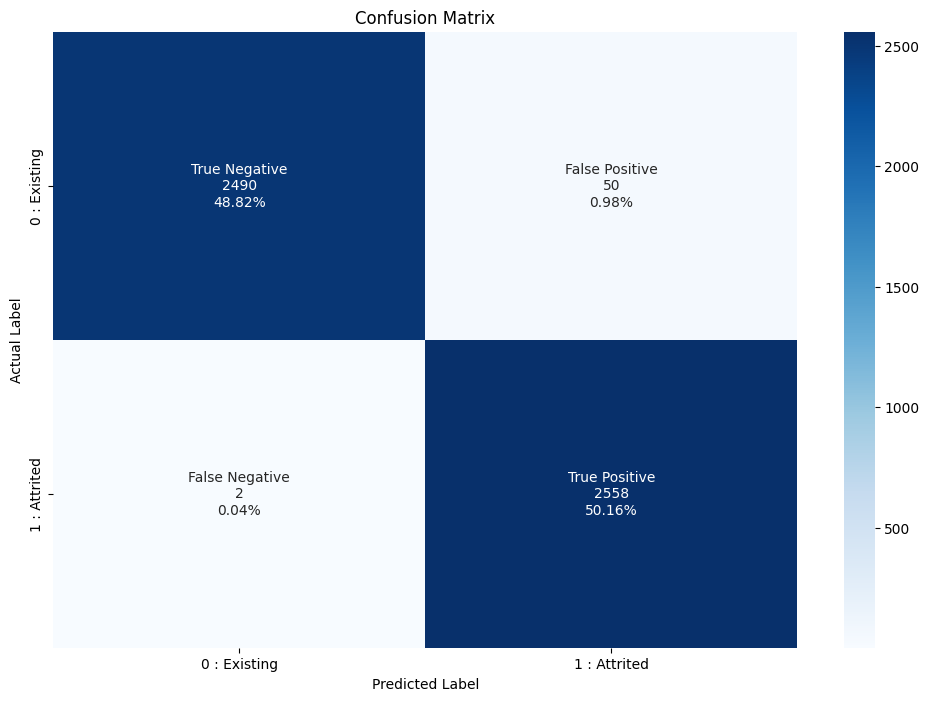


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2540
           1       0.98      1.00      0.99      2560

    accuracy                           0.99      5100
   macro avg       0.99      0.99      0.99      5100
weighted avg       0.99      0.99      0.99      5100


Accuracy score (DecisionTreeClassifier model) = 0.9898 (98.98%)


In [76]:
y_pred = model_to_train(dict['RandomForestClassifier'], X_train, y_train, X_test)
test(y_test, y_pred)

Mô hình độ chính xác cao